In [81]:
import os
import rmgpy.data.thermo
import rmgpy.thermo
import rmgpy.data.rmg
import pandas as pd
import rmgpy.quantity
import numpy as np
import parse
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
# Make a NIST library
NIST_thermo_db = rmgpy.data.thermo.ThermoDatabase()
NIST_thermo_db.libraries['temporary_lib_name_in_memory'] = rmgpy.data.thermo.ThermoLibrary() # <---------- temporary_lib_name_in_memory is just a name in memory right now
NIST_thermo_db.libraries['temporary_lib_name_in_memory'].label = 'nist'  # <-------- this determines the name of the library.py file
NIST_thermo_db.libraries['temporary_lib_name_in_memory'].name = 'NIST Alkanes'  # <------- this is the name of the library inside the file


In [214]:
text = """ethane(1)               C   2H   6          G   100.000  5000.000  954.51      1
 4.58983307E+00 1.41507715E-02-4.75962003E-06 8.60293917E-10-6.21716348E-14    2
-1.27217663E+04-3.61740116E+00 3.78033462E+00-3.24262480E-03 5.52380397E-05    3
-6.38580942E-08 2.28636966E-11-1.16203409E+04 5.21033695E+00                   4"""


# text = """C2H6                    C   2H   6          G   100.000  5000.000 1002.57      1
#  2.56122991E+00 1.83185519E-02-7.41959133E-06 1.38553537E-09-9.75184838E-14    2
# -1.19064416E+04 7.14373638E+00 3.71890614E+00 7.87935086E-04 3.81270648E-05    3
# -4.17468853E-08 1.38611864E-11-1.14896639E+04 4.79187839E+00                   4"""
# text = """C5H12                   C   5H  12          G   100.000  5000.000 1100.99      1
#  9.34165513E+00 3.60980024E-02-1.43923628E-05 2.64032159E-09-1.82931491E-13    2
# -2.30181536E+04-2.37929688E+01 1.55261784E+00 4.51578511E-02-5.25013661E-07    3
# -2.16274380E-08 8.93126787E-12-2.01369967E+04 1.98293606E+01                   4"""
# text = """C6H14                   C   6H  14          G   100.000  5000.000 1154.50      1
#  1.20304794E+01 4.12778801E-02-1.63179673E-05 2.97108817E-09-2.04503621E-13    2
# -2.68588723E+04-3.65840394E+01 8.40594975E-01 6.04367299E-02-1.57308332E-05    3
# -1.20810988E-08 6.24099411E-12-2.29681946E+04 2.46684717E+01                   4"""
# text = """C7H16                   C   7H  16          G   100.000  5000.000 1208.93      1
#  1.49497439E+01 4.61116443E-02-1.80637105E-05 3.26277968E-09-2.23043077E-13    2
# -3.08076792E+04-5.06956898E+01 1.34412153E-01 7.56212899E-02-3.04709264E-05    3
# -3.24443756E-09 3.88315381E-12-2.57998345E+04 2.94872763E+01                   4"""
# text = """C8H18                   C   8H  18          G   100.000  5000.000 1276.25      1
#  1.82294413E+01 5.04139606E-02-1.95318779E-05 3.49343399E-09-2.36784488E-13    2
# -3.49391325E+04-6.68963132E+01-5.57793352E-01 9.07556788E-02-4.51546829E-05    3
#  5.49468826E-09 1.60101494E-12-2.86337139E+04 3.42396223E+01                   4"""
# text = """C9H20                   C   9H  20          G   100.000  5000.000 1364.02      1
#  2.20559116E+01 5.39179655E-02-2.05897810E-05 3.63535063E-09-2.43653690E-13    2
# -3.93491199E+04-8.62661010E+01-1.24695046E+00 1.05876660E-01-5.97185148E-05    3
#  1.39572978E-08-5.22184900E-13-3.14684778E+04 3.89754835E+01                   4"""
# text = """C10H22                  C  10H  22          G   100.000  5000.000 1835.38      1
#  3.06087107E+01 5.07466883E-02-1.83033681E-05 3.06799640E-09-1.96435808E-13    2
# -4.62793538E+04-1.33217944E+02-2.02771327E+00 1.21873125E-01-7.64320951E-05    3
#  2.41818765E-08-3.07235420E-12-3.42991539E+04 4.40528685E+01                   4"""
species, thermo, formula = rmgpy.chemkin.read_thermo_entry(text)
thermo.get_entropy(298) / 4.184

55.07623443557317

In [196]:
# Load all the Carbon files
S298_RMG = {  # cal/(mol*K)
    1: 44.41,  # DFT_QCI_thermo
    2: 54.73,  # DFT_QCI_thermo
    3: 66.07,  # DFT_QCI_thermo
    4: 73.69,  # DFT_QCI_thermo
    5: 83.33,  # JetSurf2
    6: 92.75,  # JetSurf2
    7: 102.17,  # JetSurf2
    8: 111.59,  # JetSurf2
    9: 121.01,  # JetSurf2
    10: 130.53,  # JetSurf2
}

for i in range(1, 11):
    file_to_parse = f'/home/moon/rmg/rmg_tools/fetch_nist_data/c_pages/c{i}.htm'
    result = parse.parse_nist_page(file_to_parse)

    cp_df = result['cp_data']
    hf_df = result['hf_data']
    s_df = result['s_gas_data']
    
    temps = cp_df[cp_df['Temperature (K)'].values >= 298]['Temperature (K)'].values
    temps = rmgpy.quantity.ArrayQuantity(temps, 'K')
    cp_values = cp_df[cp_df['Temperature (K)'].values >= 298]['Cp (J/mol*K)'].values
    cp_values = rmgpy.quantity.ArrayQuantity(cp_values, 'J/(mol*K)')

    if temps.value_si[1] == temps.value_si[0]:  # random doubling of 298K data
        temps = rmgpy.quantity.ArrayQuantity(temps.value_si[1:], 'K')
        cp_values = rmgpy.quantity.ArrayQuantity(cp_values.value_si[1:], 'J/(mol*K)')
    
    hf298s = []
    hf_298_uncertainties = []
    for j in range(len(hf_df)):
        if hf_df['Quantity'].values[j] == 'ΔfH°gas':
            hf298s.append(rmgpy.quantity.Quantity(hf_df['Value'].values[j], hf_df['Units'].values[j]))
            
    hf298s = np.array([hf.value_si for hf in hf298s])
    hf298 = rmgpy.quantity.Quantity(np.nanmean(hf298s), 'J/mol')
    
    s_std = []
    for j in range(len(s_df)):
        if s_df['Quantity'].values[j] == 'S°gas':
            s_std.append(rmgpy.quantity.Quantity(s_df['Value'].values[j], s_df['Units'].values[j]))
            
    s_std = np.array([s.value_si for s in s_std])
    s_std = rmgpy.quantity.Quantity(np.nanmean(s_std), 'J/(mol*K)')
    # print(s_std)
    
    if np.isnan(s_std.value_si):
        thermo_data = rmgpy.thermo.ThermoData(
            Tdata=temps,
            Cpdata=cp_values,
            H298=hf298,
            S298=(S298_RMG[i], 'cal/(mol*K)')
        )
    else:
        thermo_data = rmgpy.thermo.ThermoData(
            Tdata=temps,
            Cpdata=cp_values,
            H298=hf298,
            S298=s_std,
        )

    species = rmgpy.species.Species(smiles='C' * i)
    species.thermo = thermo_data
    species.thermo.Cp0 = rmgpy.quantity.Quantity(species.calculate_cp0(), 'J/(mol*K)')
    species.thermo.CpInf = rmgpy.quantity.Quantity(species.calculate_cpinf(), 'J/(mol*K)')
    species.thermo = species.thermo.to_nasa(Tmin=np.min(temps.value_si), Tmax=np.max(temps.value_si), Tint=np.mean(temps.value_si))


    entry = rmgpy.data.base.Entry()
    entry.label = str(species)
    entry.item = species.molecule[0]
    entry.data = species.thermo
    NIST_thermo_db.libraries['temporary_lib_name_in_memory'].entries[entry.label] = entry


    # # plot Heat Capacities
    # plt.plot(temps.value_si, cp_values.value_si)
    # plt.title('C' * i)
    # T = np.linspace(np.min(temps.value_si), np.max(temps.value_si), 101)
    # Cps = np.zeros_like(T)
    # for j in range(len(T)):
    #     Cps[j] = species.get_heat_capacity(T[j])
    # plt.plot(T, Cps, linestyle='dashed')
    # plt.show()
    # print(species.thermo.poly1)
    # print(species.thermo.poly2)
    # print()
    
    # break
NIST_thermo_db.save_libraries('thermo')

Parsing /home/moon/rmg/rmg_tools/fetch_nist_data/c_pages/c1.htm...

Found metadata fields: 13
Compound: Methane
Extracted 5 Hf data points
Extracted 2 S gas data points
Extracted 32 Cp data points
Found 5 total table(s)
Parsing /home/moon/rmg/rmg_tools/fetch_nist_data/c_pages/c2.htm...

Found metadata fields: 14
Compound: Ethane
Extracted 3 Hf data points
Extracted 0 S gas data points
Extracted 51 Cp data points
Found 4 total table(s)
Parsing /home/moon/rmg/rmg_tools/fetch_nist_data/c_pages/c3.htm...

Found metadata fields: 14
Compound: Propane
Extracted 2 Hf data points
Extracted 0 S gas data points
Extracted 40 Cp data points
Found 4 total table(s)
Parsing /home/moon/rmg/rmg_tools/fetch_nist_data/c_pages/c4.htm...

Found metadata fields: 13
Compound: Butane
Extracted 2 Hf data points
Extracted 0 S gas data points
Extracted 27 Cp data points
Found 4 total table(s)
Parsing /home/moon/rmg/rmg_tools/fetch_nist_data/c_pages/c5.htm...

Found metadata fields: 13
Compound: Pentane
Extracted 

/tmp/ipykernel_3443/779683149.py:63: RuntimeWarning: Mean of empty slice
  s_std = rmgpy.quantity.Quantity(np.nanmean(s_std), 'J/(mol*K)')
/tmp/ipykernel_3443/779683149.py:63: RuntimeWarning: Mean of empty slice
  s_std = rmgpy.quantity.Quantity(np.nanmean(s_std), 'J/(mol*K)')
/tmp/ipykernel_3443/779683149.py:63: RuntimeWarning: Mean of empty slice
  s_std = rmgpy.quantity.Quantity(np.nanmean(s_std), 'J/(mol*K)')
/tmp/ipykernel_3443/779683149.py:63: RuntimeWarning: Mean of empty slice
  s_std = rmgpy.quantity.Quantity(np.nanmean(s_std), 'J/(mol*K)')


In [241]:
# load database for GAV
database = rmgpy.data.rmg.RMGDatabase()
database.load(
    path = rmgpy.settings['database.directory'],
    thermo_libraries = [],
    transport_libraries = [],
    reaction_libraries = [],
    seed_mechanisms = [],
    kinetics_families = [],
    kinetics_depositories = ['training'],
    depository = False,
)

In [252]:
def plot_thermos(thermos, labels=None):
    if type(thermos) != list:
        thermos = [thermos]

    if labels is None:
        labels = ['' for t in thermos]
    linestyles = ['solid', 'solid', 'dashed', 'dashed']
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('H (kJ / mol)')
    ax[0].set_title('Enthalpy vs. Temperature')
    ax[1].set_xlabel('Temperature (K)')
    ax[1].set_ylabel('S (kJ / mol K)')
    ax[1].set_title('Entropy vs. Temperature')
    ax[2].set_xlabel('Temperature (K)')
    ax[2].set_ylabel('Cp (kJ / mol K)')
    ax[2].set_title('Heat Capacity vs. Temperature')
    T = np.linspace(300, 1500, 1001)
#     T = np.linspace(300, 3000, 1001)
    for n, thermo in enumerate(thermos):
        H = np.zeros(len(T))
        S = np.zeros(len(T))
        Cp = np.zeros(len(T))
        for i in range(0, len(T)):
            H[i] = thermo.get_enthalpy(T[i]) / 1000.0
            S[i] = thermo.get_entropy(T[i]) / 1000.0
            Cp[i] = thermo.get_heat_capacity(T[i]) / 1000.0
        ax[0].plot(T, H, linestyle=linestyles[n % len(linestyles)])
        ax[1].plot(T, S, linestyle=linestyles[n % len(linestyles)])
        ax[2].plot(T, Cp, linestyle=linestyles[n % len(linestyles)])
    ax[0].legend(labels)
    ax[1].legend(labels)
    ax[2].legend(labels)
    ax[2].yaxis.get_major_formatter().set_useOffset(False)
    plt.subplots_adjust(wspace=0.25)
    plt.show()


def plot_gibbs(thermos, labels=None):
    if type(thermos) != list:
        thermos = [thermos]
    if labels is None:
        labels = ['' for t in thermos]
    linestyles = ['solid', 'solid', 'dashed', 'dashed']
    # T = np.linspace(300, 1500, 1001)
    T = np.linspace(900, 1000, 1001)
    for n, thermo in enumerate(thermos):
        G = np.zeros(len(T))
        for i in range(0, len(T)):
            G[i] = thermo.get_free_energy(T[i]) / 4184
        plt.plot(T, G, linestyle=linestyles[n % len(linestyles)])
       
    ax = plt.gca()
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('G (kcal / mol)')
    ax.set_title('Gibbs Energy vs. Temperature')
    ax.legend(labels)
   
    ax.yaxis.get_major_formatter().set_useOffset(False)
    plt.subplots_adjust(wspace=0.25)
    plt.show()


In [253]:
# try reading to test
# Load the new thermo library

thermo_lib = os.path.join('thermo')
rmg_thermo_db2 = rmgpy.data.thermo.ThermoDatabase()
rmg_thermo_db2.load_libraries(thermo_lib)
print(f'{len(rmg_thermo_db2.libraries["nist"].entries)} entries loaded')

errors = np.zeros(10) + np.nan

T = 1000.0

# print the enthalpy at 1000 K just for the heck of it
for key in rmg_thermo_db2.libraries["nist"].entries.keys():
    thermo = rmg_thermo_db2.libraries["nist"].entries[key].data

    gav_sp = rmgpy.species.Species(smiles='C' * len(key))
    gav_sp.thermo = database.thermo.get_thermo_data(gav_sp)
    
    lib_sp = rmgpy.species.Species(smiles='C' * len(key))
    lib_results = database.thermo.get_thermo_data_from_libraries(lib_sp)

    errors[len(key)-1] = np.abs((gav_sp.get_free_energy(T) - thermo.get_free_energy(T))) / 4184
    
    # print(key)
    # if lib_results is None:
    #     plot_gibbs([gav_sp, thermo], ["GAV", "NIST"])
    # else:
    #     lib_thermo, b, c = lib_results
    #     lib_sp.thermo = lib_thermo
    #     plot_gibbs([gav_sp, thermo, lib_sp], ["GAV", "NIST", "PrimaryThermoLib"])


10 entries loaded


Text(0.5, 1.0, 'T=1000.0K')

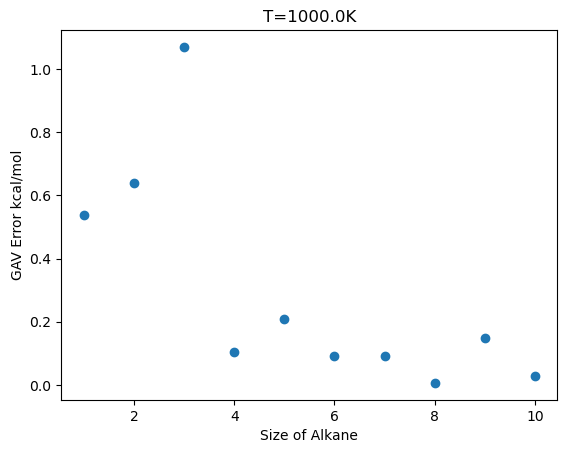

In [254]:
plt.scatter(np.arange(1, 11), errors)
plt.xlabel('Size of Alkane')
plt.ylabel('GAV Error kcal/mol')
plt.title(f'T={T}K')